## Computing the thermal gradient ##

Our objective is to compute the net weight of the balloon **after the sun sets**, from which we can calculate the change in **specific lift** of the lifting gas. To do this, recognize that at equilibrium we have: $F_\text{rest} = \frac{1}{2}\rho C_dv^2$


which means $v^2$ is proportional to $F_\text{rest}$ given a constant $\rho$ and $C_d$, which occurs when altitude is constant.

Let's import the data.


In [0]:
import pandas as pd
import sys
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import time as t
from datetime import datetime, timedelta

In [4]:
!wget https://raw.githubusercontent.com/stanford-ssi/cycloon/master/flightdata/ssi92/rock7.csv
data = pd.read_csv('rock7.csv')

--2019-10-14 07:08:59--  https://raw.githubusercontent.com/stanford-ssi/cycloon/master/flightdata/ssi92/rock7.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52096 (51K) [text/plain]
Saving to: ‘rock7.csv’

rock7.csv           100%[===================>]  50.88K  --.-KB/s    in 0.03s   

2019-10-14 07:09:00 (1.95 MB/s) - ‘rock7.csv’ saved [52096/52096]



Run the cell below to extract the data from the dataframe.

In [0]:
times = []
alts = []
bmpalts = []
rates = []

for i in range(209, 49, -1):
    point = data.iloc[i]
    time = point["Date Time (UTC)"]
    time = datetime.strptime(time, '%d/%b/%Y %H:%M:%S') - timedelta(hours=7)
    times.append(time)
    lat, lon = point.lat, point.lon
    alt = point.alt_gps
    bmp_alt = point.alt_bmp
    alts.append(alt)
    bmpalts.append(bmp_alt)

for i in range(1, len(bmpalts)):
    dalt = bmpalts[i]-bmpalts[i-1]
    dt = (times[i]-times[i-1]).seconds
    rates.append(dalt/dt)

Now we can plot the flight.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


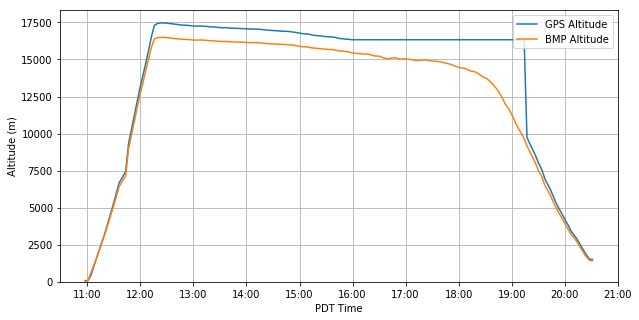

In [6]:
myFmt = DateFormatter("%H:%M") 

# tell matplotlib to use the format specified above

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times, alts, label='GPS Altitude')
ax.plot(times, bmpalts, label='BMP Altitude')
plt.xlabel('PDT Time')
plt.ylim(bottom=0)
ax.set_ylabel('Altitude (m)')
ax.legend(loc='upper right')
plt.grid()
ax.xaxis.set_major_formatter(myFmt)

Notice the main features of the flight: ascent, venting, equilibration, cooling at sunset, and descent.

Let's plot the time series data on a phase portrait. Observe the ascent and descent phases.

Text(0, 0.5, 'Ascent rate (m/s)')

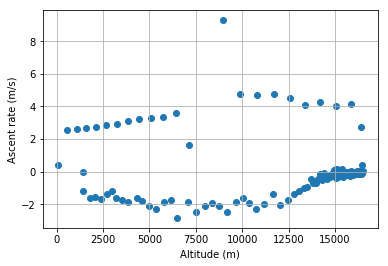

In [7]:
plt.scatter(bmpalts[1:], rates)
plt.grid()
plt.xlabel('Altitude (m)')
plt.ylabel('Ascent rate (m/s)')

Let us square the velocity. For each altitude, the velocity is propo

(0, 15)

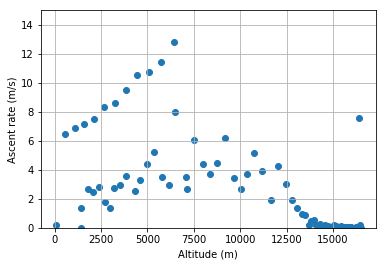

In [67]:
plt.scatter(bmpalts[1:], np.square(rates))
plt.grid()
plt.xlabel('Altitude (m)')
plt.ylabel('Ascent rate (m/s)')
plt.ylim(0, 15)

This data is super noisy. Can we do better?

**Yes.** We can smooth the ascent rate.

In [0]:
rates = []
for i in range(2, len(bmpalts)):
    dalt = bmpalts[i]-bmpalts[i-2]
    dt = (times[i]-times[i-2]).seconds
    rates.append(dalt/dt)

(0, 5)

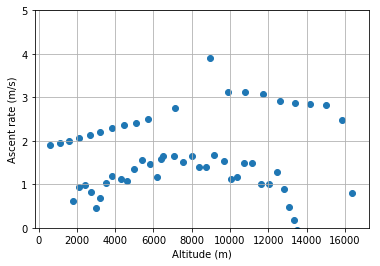

In [11]:
plt.scatter(bmpalts[2:-2], np.log(np.square((rates[1:-1]))))
plt.grid()
plt.xlabel('Altitude (m)')
plt.ylabel('Ascent rate (m/s)')
plt.ylim(0, 5)


We could plot a exponential regression but there is so much uncertainty already that we can just eyeball it. We find the the ascent plot is generally 3x the descent plot at reliable altitudes.

Recall our net lift at launch was **500 g**. Therefore our net weight after sunset was about **170 g**. Now, we must have had **1.67 kg** of lift before sunset, because that is our total system mass.

Therefore, the thermal loss at sunset is about **10%**